## I started out Learning qiskit with all my energy pretty late thats like now, Here's my attempt to i know like a of the stuff already but I want to deal with smallest details of the language. So Lets get it

In [3]:
#getting all the libraries from qiskit
from qiskit import *

#some qiskit visualization libs
from qiskit.visualization import plot_histogram, circuit_drawer, plot_bloch_multivector, plot_state_city

#the essential libraries
import numpy as np
import time 
import matplotlib.pyplot as plt
import random
import seaborn as sb #just for a better visualization sometimes i might use it.

#for running on a realdevice and linking a ibm id
from qiskit import IBMQ, Aer, execute


# Loading my IBM ID, like lets get this done asap this has bugged me alot while the IBM challenges

In [4]:
provider = IBMQ.load_account()

## List of all the available backends for me

In [15]:
available_cloud_backends = provider.backends() 
print('\nHere is the list of cloud backends that are available to you:')
for i in available_cloud_backends: print(i)


Here is the list of cloud backends that are available to you:
ibmq_qasm_simulator
ibmq_lima
ibmq_belem
ibmq_quito
simulator_statevector
simulator_mps
simulator_extended_stabilizer
simulator_stabilizer
ibmq_manila
ibm_nairobi
ibm_oslo


# Bell States

In [63]:
creg = ClassicalRegister(2 , 'c')   #Defined classical register
qreg = QuantumRegister(2 , 'q')     #Define Quantum Register

qc = QuantumCircuit(2 , 2)  #Deined A circuit

qc.h(qreg[0])
qc.cx(qreg[0], qreg[1])

# Measure both qubits
qc.measure(qreg[0], creg[0])
qc.measure(qreg[1], creg[1])


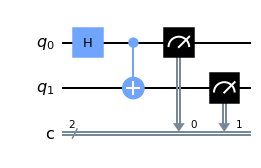

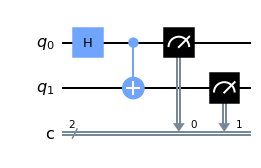

In [65]:
qc.draw('mpl')

## Running on qasm_simulator

In [66]:
backend = BasicAer.get_backend('qasm_simulator')

In [67]:
job = execute(qc,backend,shots = 1000)

In [74]:
result = job.result()

In [75]:
counts = result.get_counts()

In [76]:
print(counts)

{'00': 512, '11': 488}


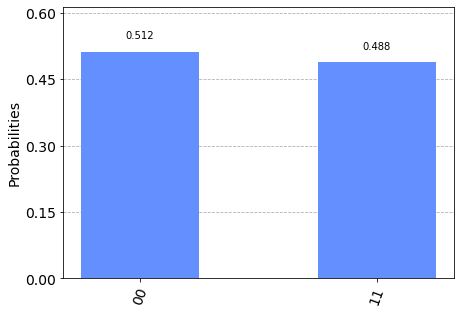

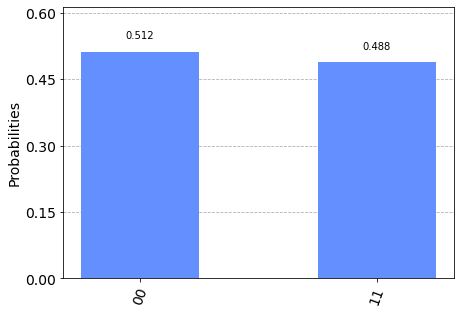

In [78]:
plot_histogram(counts)

## Running on a real device, for that we just need to define the backend to one of them available system from cells above.

In [82]:
backend_real = provider.backend.ibm_nairobi  #this is for running on a specific device 

#one can use the most free device using this
#backend  = least_busy(provider.backends())

In [83]:
job_real = execute(qc,backend_real)

In [86]:
result_real = job_real.result()

In [87]:
counts_real = result_real.get_counts()

{'00': 512, '11': 488}


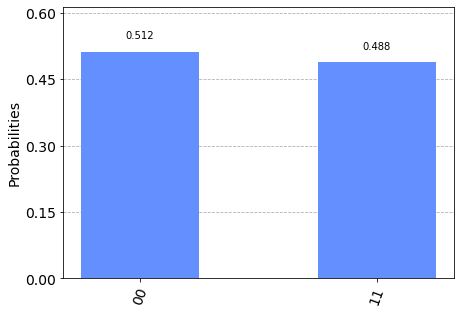

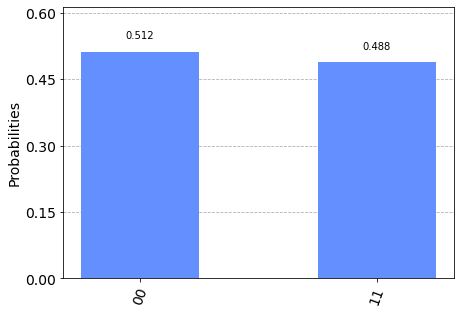

In [88]:
print(counts)
plot_histogram(counts)